In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
print(diamonds)


       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [ ]:
# 24Calcula la mitjana de cada columna numèrica

diamonds.mean(numeric_only=True)

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

In [7]:
# 25 Calcula la mitjana de cada fila
row_means = diamonds.select_dtypes(include='number').mean(axis=1)


In [9]:
# 26 Mitjana del preu per cada cut
diamonds.groupby("cut").mean(numeric_only=True)

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801


In [ ]:
# 27 Comptatge, mínim i màxim del preu per cut
diamonds.groupby("cut")["price"].agg(["count","min","max"])

,count,min,max
cut,,,
Fair,1610,337,18574
Good,4906,327,18788
Ideal,21551,326,18806
Premium,13791,326,18823
Very Good,12082,336,18818


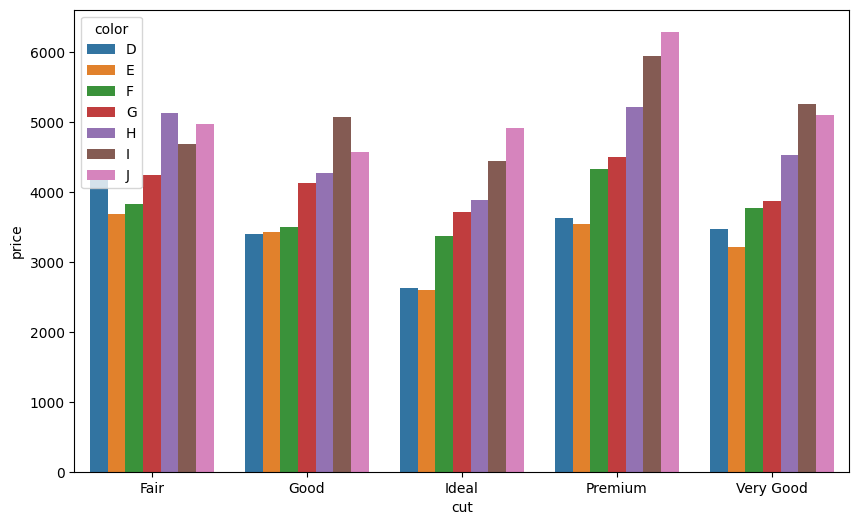

In [9]:
# 28 Gràfic de barres en paral·lel
mean_prices = diamonds.groupby(['cut', 'color'])['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=mean_prices, x='cut', y='price', hue='color')

plt.show()


In [21]:
# 29 Comptar ocurrències a cut
# Compta quantes vegades apareix cada valor de la sèrie cut.
diamonds.groupby(["cut"])['cut'].count()


cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
Name: cut, dtype: int64

In [ ]:
# 30 Percentatges dels valors de cut
# Mostra el percentatge que representa cada valor de cut dins del DataFrame (normalize=True).
diamonds['cut'].value_counts(normalize=True)




cut
Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: proportion, dtype: float64

In [22]:
# 31 Valors únics de cut
# Mostra el conjunt de valors únics de la sèrie cut.
diamonds['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [24]:
# 32 Nombre de valors únics a cut
# Compta quants valors únics hi ha a la sèrie cut.
diamonds['cut'].nunique()


5

In [36]:
# 33 Estadístiques de la sèrie cut
# Calcula estadístiques descriptives per a la sèrie cut (comptatge, moda, etc.).

print(diamonds['cut'].value_counts())

print(diamonds['cut'].mode())

print(diamonds['cut'].describe())



cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
0    Ideal
Name: cut, dtype: object
count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object


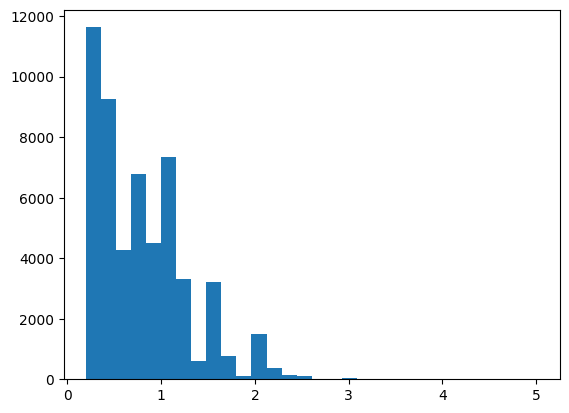

In [ ]:
# Histograma de carat
# Crea un histograma per visualitzar la distribució de la columna carat.
plt.hist(diamonds['carat'], bins=30)
plt.show()

<Axes: xlabel='cut'>

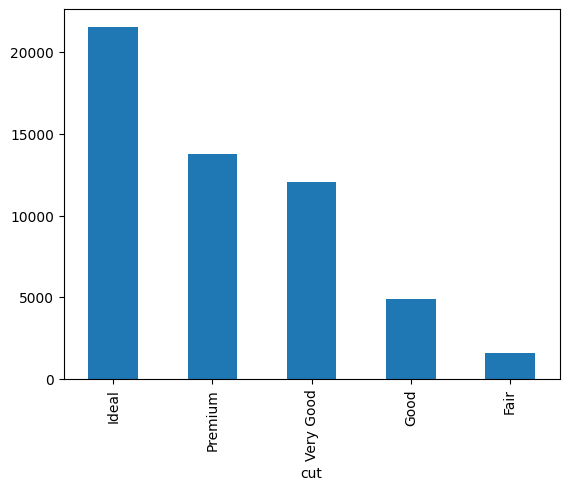

In [48]:
# 35 Gràfic de barres de value_counts() per cut
# Genera un gràfic de barres a partir de diamonds['cut'].value_counts().
counts = diamonds['cut'].value_counts()
counts.plot(kind='bar')

In [50]:
# 36 Comptar NaN per sèrie
# Compta el nombre de valors perduts a cada columna del DataFrame.

diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [52]:
# 37 Eliminar files amb algun valor perdut i comprovar la mida
# Mostra la forma (shape) del DataFrame i elimina les files amb qualsevol valor perdut. Torna a mostrar la forma.
print("Original:", diamonds.shape)

diamonds_net = diamonds.dropna()
print("Eliminar NaN:", diamonds_net.shape)


Original: (53940, 10)
Eliminar NaN: (53940, 10)


In [ ]:
# 38 Eliminar files segons valors perduts en dues columnes
# Elimina una fila si qualsevol o tots els valors són perduts en dues columnes específiques (p. ex., x i y).
diamonds.dropna(subset=['x', 'y'], how='any')


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [56]:
# 39 Producte de x, y i z per diamant
# Calcula el producte x*y*z per a cada diamant (volum aproximat) i afegeix-ho com a nova columna.
diamonds["volum aproximat"] = diamonds["x"]*diamonds["y"]*diamonds["z"]
print(diamonds)

       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

       volum aproximat  
0            3

In [ ]:
# 40 Llegir files especificades i totes les columnes
# Llegeix un conjunt de files específiques (p. ex., una llista d’índexs) i totes les columnes.
diamonds.loc[[0, 1, 5]]



,color,clarity,depth,table,price
0,E,SI2,61.5,55.0,326
1,E,SI1,59.8,61.0,326
5,J,VVS2,62.8,57.0,336


In [ ]:
# 41 Files 0–2 i columnes de color a price
# Extreu les files 0 a 2 (inclusives) i les columnes des de color fins a price (ambdues incloses).

diamonds.loc[[0, 2],'color':'price']


,color,clarity,depth,table,price
0,E,SI2,61.5,55.0,326
2,E,VS1,56.9,65.0,327


In [64]:
# 42 Files amb cut == 'Premium', columna color
# Selecciona les files on cut és 'Premium' i mostra la columna color.
diamonds[diamonds["cut"] == "Premium"]["color"]

1        E
3        I
12       F
14       E
15       E
        ..
53928    E
53930    E
53931    F
53934    D
53938    H
Name: color, Length: 13791, dtype: object

In [ ]:
# 43 Resum concís del DataFrame
# Imprimeix un resum concís de diamonds (informació d’dtypes, no-nuls, etc.).
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carat            53940 non-null  float64
 1   cut              53940 non-null  object 
 2   color            53940 non-null  object 
 3   clarity          53940 non-null  object 
 4   depth            53940 non-null  float64
 5   table            53940 non-null  float64
 6   price            53940 non-null  int64  
 7   x                53940 non-null  float64
 8   y                53940 non-null  float64
 9   z                53940 non-null  float64
 10  volum aproximat  53940 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB


In [66]:
# 44 Mostreig aleatori de files
# Obté una mostra aleatòria de files del DataFrame .sample(n=10).
diamonds.sample(n=10)


,carat,cut,color,clarity,depth,table,price,x,y,z,volum aproximat
41894,0.56,Very Good,E,SI2,63.5,57.0,1259,5.24,5.21,3.32,90.637328
16628,1.07,Ideal,G,VS2,62.4,55.0,6648,6.53,6.58,4.09,175.736666
38374,0.44,Premium,F,SI1,60.9,58.0,1023,4.96,4.92,3.01,73.453632
6203,1.00,Premium,G,SI2,59.0,62.0,3998,6.52,6.47,3.83,161.566252
18008,1.05,Fair,G,VS1,65.6,58.0,7283,6.25,6.38,4.13,164.683750
24437,2.12,Premium,H,SI2,62.3,58.0,12693,8.25,8.16,5.12,344.678400
25634,1.51,Ideal,G,VS1,60.6,57.0,14507,7.48,7.38,4.50,248.410800
34116,0.31,Ideal,E,VVS1,61.7,56.0,853,4.38,4.40,2.71,52.227120
44712,0.50,Ideal,E,VS2,61.4,55.0,1614,5.13,5.16,3.16,83.647728
28561,0.30,Ideal,H,VS1,61.6,55.0,675,4.30,4.27,2.64,48.473040


In [67]:
# 45 Detectar duplicats a color
# Detecta les files que tenen color duplicat utilitzant una funció de duplicats.
diamonds["color"].duplicated()


0        False
1         True
2         True
3        False
4        False
         ...  
53935     True
53936     True
53937     True
53938     True
53939     True
Name: color, Length: 53940, dtype: bool

In [68]:
# 46 Comptar files duplicades
# Compta quantes files duplicades hi ha al DataFrame diamonds.
diamonds.duplicated().sum()



np.int64(146)